# Before Convolutional Neural Network
---

## Real Game : CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [1]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### 데이터를 불러옵시다.

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 56s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 5985
다음 그림은 Deer 입니다.


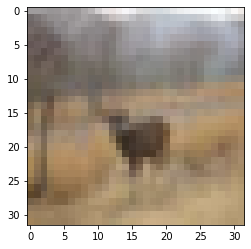

In [14]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format( labels[test_y[id][0]] ))
plt.imshow(test_x[id])
plt.show()

In [7]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


### 코드를 완성해주세요!

해야 할 일

1. 전처리
    * x, y에 대하여 모두! 단, x에 대하여 reshape를 의도한 것은 아닙니다!

2. 모델링
    * 이미지 데이터를 펼쳐주는 레이어를 사용하세요.
    * 히든 레이어 4개 사용, 각 노드는 512, 512, 256, 128
    * 이 문제는 회귀? 분류?

3. 학습
    * epochs=50, validation_split=0.2, early stopping
    * epoch별 accuracy, loss가 보고 싶다면 history라는 변수에 담아내자!

In [8]:
#############
# Your Code #
#############
# Min Max Scaling
min_n, max_n = train_x.min(), train_x.max()

train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)
print(train_x.min(), train_x.max(), test_x.min(), test_x.max())

0.0 1.0 0.0 1.0


In [15]:
#############
# Your Code #
#############
from tensorflow.keras.utils import to_categorical

In [16]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [17]:
print(train_y.shape, test_y.shape)

(50000, 10) (10000, 10)


In [56]:
#############
# Your Code #
#############

# 1. 세션 초기화
keras.backend.clear_session()

# 2. 모델 생성
model = keras.models.Sequential()

# 3. 모델 쌓기
model.add( keras.layers.Input(shape=(32, 32, 3)) )
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense(512, activation='swish') )
model.add( keras.layers.Dense(512, activation='swish') )
model.add( keras.layers.Dense(256, activation='swish') )
model.add( keras.layers.Dense(128, activation='swish') )
model.add( keras.layers.Dense(10, activation='softmax') )

# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,001,546
Trainable params: 2,001,546
Non-

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
#############
# Your Code #
#############
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(train_x, train_y, epochs=50, validation_split=0.2, callbacks=[es])

Epoch 1/50
1250/1250 [==============================] - 8s 5ms/step - loss: 1.8574 - accuracy: 0.3204 - val_loss: 1.7974 - val_accuracy: 0.3495
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6880 - accuracy: 0.3897 - val_loss: 1.6603 - val_accuracy: 0.4040
Epoch 3/50
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5993 - accuracy: 0.4225 - val_loss: 1.5960 - val_accuracy: 0.4306
Epoch 4/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5333 - accuracy: 0.4467 - val_loss: 1.5791 - val_accuracy: 0.4381
Epoch 5/50
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4829 - accuracy: 0.4681 - val_loss: 1.5622 - val_accuracy: 0.4420
Epoch 6/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4391 - accuracy: 0.4821 - val_loss: 1.5732 - val_accuracy: 0.4470
Epoch 7/50
1250/1250 [==============================] - 6s 4ms/step - loss: 1.3932 - accuracy: 0.4995 - val_loss: 1.5026 - val_accuracy:



---



In [59]:
performance_test = model.evaluate(test_x, test_y)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 1.4748 - accuracy: 0.4789
Test Loss : 1.474784,  Test Accuracy : 47.890%


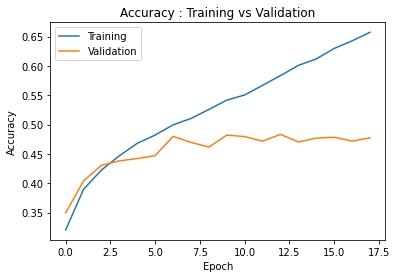

In [60]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

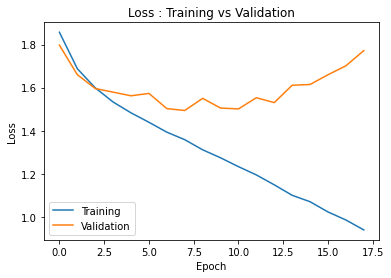

In [61]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [62]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 52.59%
테스트 정확도 : 47.89%


id = 631
다음 그림은 Dog 입니다.
모델의 예측 : Bird
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 29.0, 'Cat': 22.0, 'Deer': 16.0, 'Dog': 9.0, 'Frog': 16.0, 'Horse': 2.0, 'Ship': 0.0, 'Truck': 0.0}
틀렸어요


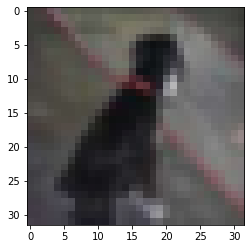

In [64]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y.argmax(axis=1)[id]] ))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]] ))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()